# Calculo de $\tau$

La simulación consiste en bombardear una NP sin dopamiento un número N suficientemente grande y para cada bombardeo contar la cantidad de pasos. Luego, multiplicamos cada cantidad de pasos por $\Delta t$ y con estos datos realizamos un histograma. El histograma tendría que tener forma exponencial, al cual al realizarle un ajuste de curva obtenemos el valor de $\tau$ (tiempo de vida medio del exiton dentro de la NP sin dopamiento). Si bien nosotros sabemos de antemano este valor, la idea es validar que el código esta implementado correctamente.

In [8]:
import sys
sys.path.append('../')

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica']})
rc('text', usetex=True)

%matplotlib inline

import ten
from ten.experiments.mechanisms import forster, boolean

In [9]:
# Dopantes propios (intrisicos) de la NP
dopantes_propios = ten.Aceptor(number=0, r_mechanisms=1, way='vol')

# Dopantes que le vamos a agregar a la NP
dopantes = ten.Aceptor(number=0, r_mechanisms=3.14, way='vol')

# Nanoparticula
tau_D=0.333
NP = ten.Nanoparticle(r_param=[15, 0], tau_d=tau_D, mean_path=80, epsilon=1, 
                  intrinsic_aceptors=dopantes_propios)
print(NP)

Radio: 15 ~ U(15, 0),
Tau: 0.333, Mean_path: 80, Epsilon: 1,
Delta_t: 0.0041625, Prob decay: 0.012422199506118559,
Number Intrisic aceptors: 0, R_Mechanisms: 1, way: vol


In [10]:
# Single photon counting
out = ten.experiments.single_count(NP, dopantes, forster, 'laser', exitations=3000)

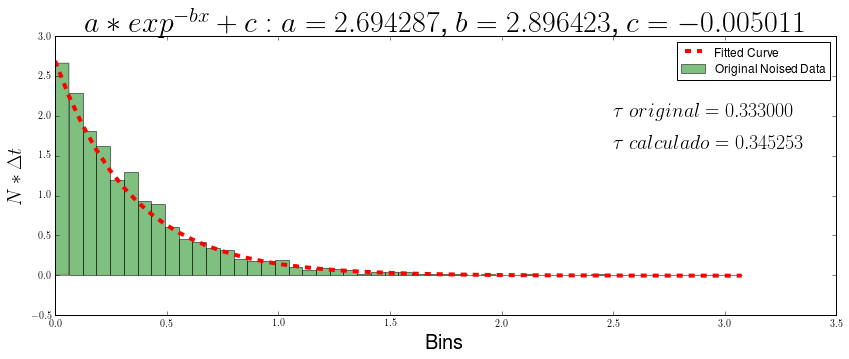

In [12]:
# Función con la cual voy a realizar el ajuste
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

num_bins = 50
# the histogram of the data
plt.figure(figsize=(14, 5))
n, bins, patches = plt.hist(out[0]*NP.delta_t, num_bins, normed=1, facecolor='green', alpha=0.5, 
                            label="Original Noised Data")

popt, pcov = curve_fit(func, bins[:-1], n)

plt.plot(bins, func(bins, popt[0], popt[1], popt[2]), 'r--', linewidth=4, label="Fitted Curve")
plt.xlabel('Bins',fontsize=20)
plt.ylabel(r'$N*\Delta t$',fontsize=20)
plt.title(r'$a*exp^{-bx}+c:$ $a=%f$, $b=%f$, $c=%f$' %(popt[0], popt[1], popt[2]),fontsize=30)
plt.text(2.5, 2, r'$\tau\; original = %f$' %(tau_D), fontsize=20)
plt.text(2.5, 1.6, r'$\tau\; calculado = %f$' %(1/popt[1]), fontsize=20)
plt.legend()

plt.show()

In [5]:
#Este css esta basado en el de @LorenaABarba y su grupo
from IPython.core.display import HTML
css_file = 'css/personal.css'
HTML(open(css_file, "r").read())

##### Licencia
El código esta licenciado bajo MIT.

La documentación bajo:

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">TEN</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Laboratorio de Microscopia Óptica Avanzada - UNRC</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/pewen/ten" rel="dct:source">https://github.com/pewen/ten</a>